In [1]:
import pandas as pd

In [2]:
import re
import requests
from bs4 import BeautifulSoup
import pandas as pd
from konlpy.tag import Okt  
okt = Okt() 
import tensorflow as tf
import numpy as np
from collections import Counter

from wordcloud import WordCloud
import matplotlib.pyplot as plt


import urllib.request
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
import matplotlib.pyplot as plt 
from string import punctuation
import warnings
warnings.filterwarnings('ignore')

In [4]:
import seaborn as sns
import matplotlib.font_manager as fm

# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

plt.rc('font', family='malgun gothic') # 그래프에서 한글 깨지는 현상 방지
plt.rcParams['axes.unicode_minus']=False #음수 부호 깨짐 방지

---

### 데이터 불러오기

In [5]:
sort_total_years = pd.read_csv('sort_total_years.csv')

In [6]:
sort_like40 = sort_total_years[sort_total_years['year']=='1940y']
print('40년대 곡 개수 : ',len(sort_like40))
# sort_like40.head(2)

sort_like50 = sort_total_years[sort_total_years['year']=='1950y']
print('50년대 곡 개수 : ',len(sort_like50))
# sort_like50.head(2)

sort_like60 = sort_total_years[sort_total_years['year']=='1960y']
print('60년대 곡 개수 : ',len(sort_like60))
# sort_like60.head(2)

sort_like70 = sort_total_years[sort_total_years['year']=='1970y']
print('70년대 곡 개수 : ',len(sort_like70))
# sort_like70.head(2)

sort_like80 = sort_total_years[sort_total_years['year']=='1980y']
print('80년대 곡 개수 : ',len(sort_like80))
# sort_like80.head(2)

sort_like90 = sort_total_years[sort_total_years['year']=='1990y']
print('90년대 곡 개수 : ',len(sort_like90))
# sort_like90.head(2)

sort_like20 = sort_total_years[sort_total_years['year']=='2000y']
print('2000년대 곡 개수 : ',len(sort_like20))
# sort_like20.head(2)

sort_like2010 = sort_total_years[sort_total_years['year']=='2010y']
print('2010년대 곡 개수 : ',len(sort_like2010))
# sort_like2010.head(2)

40년대 곡 개수 :  98
50년대 곡 개수 :  98
60년대 곡 개수 :  88
70년대 곡 개수 :  179
80년대 곡 개수 :  339
90년대 곡 개수 :  572
2000년대 곡 개수 :  1028
2010년대 곡 개수 :  906


---

## 신조어  

In [7]:
from ckonlpy.tag import Twitter
twitter = Twitter()

In [8]:
add_words = ['먹방','대박','귀요미','네티즌','갑질','짱','사재기','인플루언서',
             '탕진잼', '인싸', '자만추', '카카오톡', '현타',
'플렉스','번아웃','티키타카','스포','스포일러','꼰대','밈','내로남불',
'인싸','아싸','이모티콘','최애','시강','시선강탈','절교','근자감','인만추',
'썸네일','탕진잼','사이다','자존감','정주행','코스프레','셀럽','하드캐리',
'해시태그','스타벅스','인스타','인스타그램','카카오톡','네이버','넷플릭스',
'유레카','치맥','랜선','듣보잡','남사친','여사친','레알','셀카','셀피','셀카봉',
'떡상','프사','카톡','읽씹','존버','지못미','불멍','취존','어그로','손절',
'버킷리스트','어벤져스','콜라보','케미','라떼','수능','화양연화','콘텐츠','현타',
'할로윈','크리스마스','마카롱','크로플','반박불가','솔까','알못','꽃길','힐링',
'고인물','언팔','팔로우','맞팔','포스팅','갤러리','소울메이트','타임라인',
'그루브','발라드','혼밥','프로포즈','데칼코마니','비트','아티스트','래퍼','힙합',
'디엠','트위터','선팔','떡밥','스트리밍','브이','레인보우','와이파이',
'아이돌','히트','댓글','컬러링','혼술','센치','방탄소년단','아이유','아이오아이',
'아메리카노','티켓','베프','스밍','버건디','아이템','지옥철','트렌드','트렌디',
'데님','카라','후드','비주얼','레알','스마트폰','플레이리스트','유튜브','어플',
'핫스팟','업로드','채팅','싸이월드','페이스북','페북','보이스','배경화면',
'서버','키보드','마우스','블루투스','솔로','캘리그라피',
'이모티콘','아이폰','꽁냥','컨텐츠','클라우드','메신저','메시지',
'존버','즐겨찾기','바탕화면','치킨','마시멜로','초콜렛','케이크','케잌','스무디',
'팝콘','시리얼','앱','지못미','츄러스','빼빼로','퐁듀','에스프레소',
'프라푸치노','카푸치노','달고나','파스타','까르보나라','팥빙수','악플',
'데스티니','썸남','썸녀','밀당','젤리','마들렌','토스트','밀크티','푸딩',
'이벤트','머핀','에이드','라임','버블티','쉐이크','캘리','프러포즈','퍼즐',
'옥탑방','팔레트','망고','심쿵','하트','휘게','예스','소맥',
'모히또','샴페인','아이언맨','집순','폴라로이드','롤링페이퍼','홍대','컬쳐','체리','블루베리',
'출첵','프로젝트','뉴욕','할리우드','헐리웃','등골 브레이커','어장관리','멘붕','쩔어','노잼',
'하드캐리','페이스','아몬드','싱글','메이크업','크레딧','아트','러블리','애니','시티']

In [9]:
len(add_words)

236

In [10]:
# 리스트에 담긴 단어만큼 사전에 추가
for i in range(len(add_words)):
    twitter.add_dictionary(add_words[i], 'Noun')

In [11]:
twitter.add_dictionary('아름다운', 'Adjective')
twitter.add_dictionary('좋아하는', 'Adjective')
twitter.add_dictionary('아름 다운', 'Adjective')
twitter.add_dictionary('외로운', 'Adjective')
twitter.add_dictionary('보고 싶은', 'Adjective')
twitter.add_dictionary('지나버린', 'Adjective')
twitter.add_dictionary('외로움', 'Noun')
twitter.add_dictionary('괴로움', 'Noun')

In [12]:
twitter.add_dictionary('찰랑거린다', 'Verb')
twitter.add_dictionary('내린다', 'Verb')
twitter.add_dictionary('울린다', 'Verb')
twitter.add_dictionary('들린다', 'Verb')
twitter.add_dictionary('흐린다', 'Verb')
twitter.add_dictionary('어린다', 'Verb')
twitter.add_dictionary('보고 싶다', 'Verb')

In [13]:
twitter.add_dictionary('마도로스', 'Noun')

### 불용어

In [14]:
# ! pip install torch==1.8.2+cpu torchvision==0.9.2+cpu torchaudio==0.8.2 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

In [15]:
 # 불용어 (가사 빈도수 높은 + 감정분류와 무관한 단어 추가 중)
stop_w = ['all','이렇게','네가','있는','니가','없는','너의','너무','그런','계속','않는','랄랄','보는',
          'oh','whoo','tuesday','내가','너를','나를','we','this','the','그렇게','없네','있네','때문',
          'so','am','baby','and','can','you','much','me','for','go','in','아가','라보','아주','다오',
          '은', '는', '이', '가', '하','부터','처럼','까지','어가','무엇','어디','그게','나와',
          'know','no','of','let','my','수','너','내','나','그','난','봐','했어','마치','목화','네로',
          '돼','건','모든','에서','에게','싶어','잖아','어요','리리','나나','조금','한번','모습',
          '날','널','수','것','못','말','넌','젠','하나','정말','알','여기','드는','많은','이대','도록',
          '조금','위해','수가','아가','어디','나도','만큼','다른','어서','들은','아래','봐도',
          '다시','하게','니까','같은','다가','아무','어도','가는','구나','이면','다운','누가','간다',
          '들을', '들이', '얘기', '모모','하네','라차','노다지','소리','아직',
          '때','아','더','게','또','채','일','걸','누구','나는','너는','라면','면서','는가','이상',
          '같아','있어','사랑','그대','우리','마음','사람','지금','모두','생각','자꾸','오늘',
          '의','가','보','들','좀','잘','걍','과','도','를','으로','우린','하지','베사','빨간','언제',
          '해도','하고','없어','않아','오동동','레이','짜기','까투리','마다','토요일','리라','이런',
          '자','에','와','한','하다','네','있다','나의','해','다','내게','왜','깜빡','수가','린다',
          '거야','이제','그냥','했던','하는','지나','되어','가지','카우보이']
# 우리 , 그대 , 마음 , 사랑 , 사람

In [16]:
len(stop_w)

212

In [17]:
stop_w[-21]

'한'

---

##  주요 키워드 추출
* 1940 / 1950 / 1960 / 1970 / 1980 / 1990 / 2000 / 2010

## 1940 년대

In [18]:
# like count 정렬 맞는지 다시 확인
sort_like40.head(2)

,song_id,song_name,artist,album,Like_Count,Lyric,cover_url,tags,year
0,191162,오빠는 풍각(風角)쟁이,박향림,유성기로 듣던 불멸의 명가수 - 박향림 편,1914,오빠는 풍각쟁이야 머 오빠는 심술쟁이야 머 난몰라 난몰라 내반찬 다 뺏어 먹는거...,https://image.bugsm.co.kr/album/images/200/101...,"['연도별 인기가요', '올디스', '연대별', '연대별 음악']",1940y
1,80078168,애수의 소야곡,남인수,남인수 골든,937,운다고 옛사랑이 오리요만은 눈물로 달래보는 구슬픈 이밤 고요히 창을 열고 별빛...,https://image.bugsm.co.kr/album/images/200/800...,"['연도별 인기가요', '올디스', '연대별', '연대별 음악']",1940y


In [19]:
lyric40 = sort_like40.Lyric

### 토큰화

In [20]:
tagging_okt = []
for i in lyric40:
    tag_word = twitter.pos(i, stem=False)
    tagging_okt.append(tag_word)

### 말뭉치 담기 (형용사, 명사, 동사)

In [21]:
corpus = []
for song in tagging_okt:
    for word in song:
        if (word[1] == 'Adjective') or (word[1] =='Noun') or (word[1] =='Verb'):
            corpus.append(word[0])

### 딕셔너리 생성 (단어, 빈도수 count)

In [22]:
word_dict = {}
for i in corpus:
    if i in word_dict:
        word_dict[i] += 1
    else: 
        word_dict[i] = 1
        
# print(word_dict)

## CountVectorizer

In [23]:
#max_features는 corpus중 빈도수가 가장 높은 순으로 해당 개수만큼만 뽑아냄 

In [24]:
cv = CountVectorizer(max_features=5000, stop_words=stop_w) 
tdm = cv.fit_transform(corpus)

In [25]:
# tdm.shape
# len(cv.get_feature_names())
print(tdm.shape)
print(len(cv.get_feature_names()))

(6630, 1915)
1915


In [26]:
cv.get_feature_names()[:10]

['가거라', '가고', '가구', '가기', '가까웠다', '가나', '가네', '가노', '가느냐', '가는것이']

In [27]:
wc = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat
})

ww420 = wc.sort_values('빈도', ascending=False).head(20)
ww420

,단어,빈도
315,노래,42
343,눈물,41
32,가슴,27
121,고향,27
73,거리,20
1126,아리랑,19
981,서울,19
723,바다,19
1188,어머님,18
1760,풍년,18


In [28]:
# sort_like40[sort_like40['Lyric'].str.contains('풍년')]['Lyric']#.iloc[0]

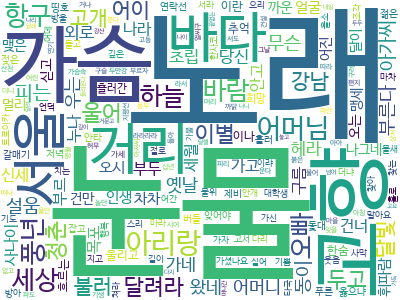

In [29]:
WC = WordCloud(font_path='NanumBarunGothic.ttf' ,background_color='white', width=400, height=300)
count_dic = wc.set_index('단어')['빈도'].to_dict()
# count_dic
cloud = WC.generate_from_frequencies(count_dic)
cloud.to_image()

### 연대 빈도수 높은 단어 top 11

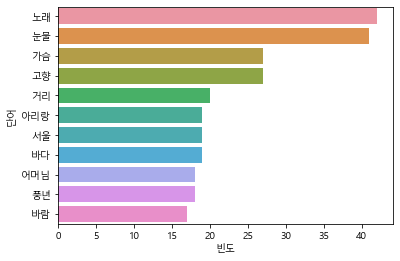

In [30]:
# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline
plt.rc('font', family='malgun gothic') # 그래프에서 한글 깨지는 현상 방지
plt.rcParams['axes.unicode_minus']=False #음수 부호 깨짐 방지
wc11 = wc.sort_values('빈도', ascending=False).head(11)
sns.barplot(wc11['빈도'],wc11['단어'])

sns.set(rc={'figure.figsize':(20,20)}) # , font='NanumBarunGothic.ttf'

## 연도 칼럼 추가

In [31]:
# 1990 Top11 words
wc11['year'] = '1940y'
wc1940 = wc11
wc1940

,단어,빈도,year
315,노래,42,1940y
343,눈물,41,1940y
32,가슴,27,1940y
121,고향,27,1940y
73,거리,20,1940y
1126,아리랑,19,1940y
981,서울,19,1940y
723,바다,19,1940y
1188,어머님,18,1940y
1760,풍년,18,1940y


### 리스트에 담기

In [32]:
wc1940['단어'].unique().tolist()

['노래', '눈물', '가슴', '고향', '거리', '아리랑', '서울', '바다', '어머님', '풍년', '바람']

In [33]:
top_word40 = wc1940['단어'].unique().tolist()

In [ ]:
# 연대별 특정 단어가 포함된 가사 출력
# sort_like40[sort_like40['Lyric'].str.contains('노래')]['Lyric'] #.iloc[0]

## 다음 연대 결과에 제외시키기 위해 불용어로 추가

In [34]:
stop_w40 = stop_w + top_word40

In [35]:
len(stop_w40)

223

---

## 1950 년대

In [36]:
# like count 정렬 맞는지 다시 확인
sort_like50.head(2)

,song_id,song_name,artist,album,Like_Count,Lyric,cover_url,tags,year
98,80078170,추억의 소야곡,남인수,남인수 골든,1061,다시 한 번 그 얼굴이 보고 싶어라 몸부림치며 울며 떠난 사람아 저 달이 밝혀...,https://image.bugsm.co.kr/album/images/200/800...,"['연도별 인기가요', '1950년대', '연대별', '국내', '연대별 음악']",1950y
99,1897305,열아홉 순정,이미자,이미자 골든베스트 2,930,보기만 하여도 울렁 생각만 하여도 울렁 수줍은 열 아홉 살 움트는 첫사랑을 몰라 ...,https://image.bugsm.co.kr/album/images/200/214...,"['연도별 인기가요', '1950년대', '연대별', '국내', '연대별 음악']",1950y


In [37]:
lyric50 = sort_like50.Lyric

In [38]:
tagging_okt = []
for i in lyric50:
    tag_word = twitter.pos(i,stem=False)
    tagging_okt.append(tag_word)

In [39]:
corpus = []
for song in tagging_okt:
    for word in song:
        if (word[1] == 'Adjective') or (word[1] =='Noun') or (word[1] =='Verb'):
            corpus.append(word[0])

In [40]:
word_dict = {}
for i in corpus:
    if i in word_dict:
        word_dict[i] += 1
    else: 
        word_dict[i] = 1
        
# print(word_dict)

In [41]:
cv = CountVectorizer(max_features=5000, stop_words=stop_w40) 
tdm = cv.fit_transform(corpus)

# tdm.shape
# len(cv.get_feature_names())
print(tdm.shape)
print(len(cv.get_feature_names()))

(6039, 1681)
1681


In [42]:
cv.get_feature_names()[:10]

['가고', '가기', '가나', '가냘퍼', '가네', '가느냐', '가느니', '가닥', '가더라', '가던']

In [43]:
wc = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat
})

ww520 = wc.sort_values('빈도', ascending=False).head(20)
ww520

,단어,빈도
1238,이별,19
1174,운다,18
1019,아가씨,17
1167,우는,16
1303,잡고,15
87,고개,15
790,불러,15
645,물새,14
1334,전선,14
1119,영원,13


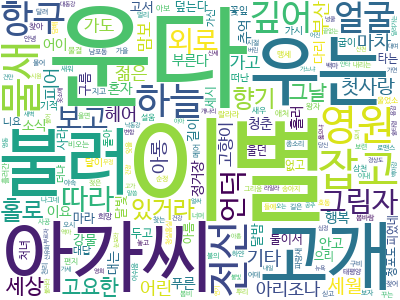

In [44]:
WC = WordCloud(font_path='NanumBarunGothic.ttf' ,background_color='white', width=400, height=300)
count_dic = wc.set_index('단어')['빈도'].to_dict()
# count_dic
cloud = WC.generate_from_frequencies(count_dic)
cloud.to_image()

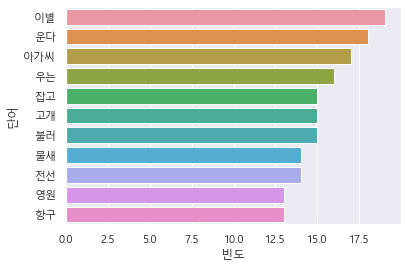

In [45]:
# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline
plt.rc('font', family='malgun gothic') # 그래프에서 한글 깨지는 현상 방지
plt.rcParams['axes.unicode_minus']=False #음수 부호 깨짐 방지
wc11 = wc.sort_values('빈도', ascending=False).head(11)
sns.barplot(wc11['빈도'],wc11['단어'])

sns.set(rc={'figure.figsize':(20,20)}) # , font='NanumBarunGothic.ttf'

In [46]:
# 1950 Top11 words
wc11['year'] = '1950y'
wc1950 = wc11
wc1950

,단어,빈도,year
1238,이별,19,1950y
1174,운다,18,1950y
1019,아가씨,17,1950y
1167,우는,16,1950y
1303,잡고,15,1950y
87,고개,15,1950y
790,불러,15,1950y
645,물새,14,1950y
1334,전선,14,1950y
1119,영원,13,1950y


In [47]:
top_word50 = wc1950['단어'].unique().tolist()
stop_w50 = stop_w + top_word50
len(stop_w50)

223

---

## 1960 년대

In [48]:
# like count 정렬 맞는지 다시 확인
sort_like60.head(2)

,song_id,song_name,artist,album,Like_Count,Lyric,cover_url,tags,year
196,111110,안개낀 장충단 공원,배호,불멸(不滅)의 가수(歌手) 배호(裵湖) 전곡,2966,안개 낀 장충단 공원 누구를 찾아왔나 낙엽송 고목을 말 없이 쓸어 안고 울고만 있...,https://image.bugsm.co.kr/album/images/200/157...,"['연도별 인기가요', '1960년대', '연대별', '국내', '연대별 음악']",1960y
197,65527,카츄샤의 노래,송민도,송민도 히트전집,2580,커피 한 잔을 시켜놓고 그대 올 때를 기다려봐도 왠일인지 오지를 않네 내...,https://image.bugsm.co.kr/album/images/200/50/...,"['연도별 인기가요', '1960년대', '연대별', '국내', '연대별 음악']",1960y


In [49]:
lyric60 = sort_like60.Lyric

In [50]:
tagging_okt = []
for i in lyric60:
    tag_word = twitter.pos(i,stem=False)
    tagging_okt.append(tag_word)

In [51]:
corpus = []
for song in tagging_okt:
    for word in song:
        if (word[1] == 'Adjective') or (word[1] =='Noun') or (word[1] =='Verb'):
            corpus.append(word[0])

In [52]:
word_dict = {}
for i in corpus:
    if i in word_dict:
        word_dict[i] += 1
    else: 
        word_dict[i] = 1
        
# print(word_dict)

In [53]:
cv = CountVectorizer(max_features=5000, stop_words=stop_w50) 
tdm = cv.fit_transform(corpus)

# tdm.shape
# len(cv.get_feature_names())
print(tdm.shape)
print(len(cv.get_feature_names()))

(5593, 1414)
1414


In [54]:
cv.get_feature_names()[:10]

['가가', '가겠노', '가고', '가나', '가냘픈', '가네', '가느냐', '가는지', '가도', '가득']

In [55]:
wc = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat
})

ww620 = wc.sort_values('빈도', ascending=False).head(20)
ww620

,단어,빈도
19,가슴,37
680,사나이,24
262,눈물,23
914,얼굴,21
537,바람,20
932,여자,19
600,보고,18
1328,하늘,16
931,여인,16
56,거리,15


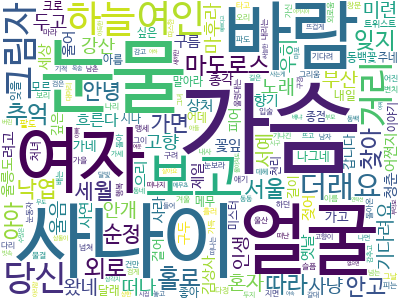

In [56]:
WC = WordCloud(font_path='NanumBarunGothic.ttf' ,background_color='white', width=400, height=300)
count_dic = wc.set_index('단어')['빈도'].to_dict()
# count_dic
cloud = WC.generate_from_frequencies(count_dic)
cloud.to_image()

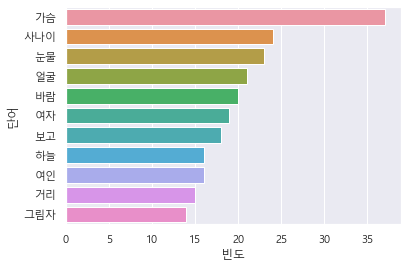

In [57]:
# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline
plt.rc('font', family='malgun gothic') # 그래프에서 한글 깨지는 현상 방지
plt.rcParams['axes.unicode_minus']=False #음수 부호 깨짐 방지
wc11 = wc.sort_values('빈도', ascending=False).head(11)
sns.barplot(wc11['빈도'],wc11['단어'])

sns.set(rc={'figure.figsize':(20,20)}) # , font='NanumBarunGothic.ttf'

In [58]:
# 2010 Top11 words
wc11['year'] = '1960y'
wc1960 = wc11
wc1960

,단어,빈도,year
19,가슴,37,1960y
680,사나이,24,1960y
262,눈물,23,1960y
914,얼굴,21,1960y
537,바람,20,1960y
932,여자,19,1960y
600,보고,18,1960y
1328,하늘,16,1960y
931,여인,16,1960y
56,거리,15,1960y


In [60]:
top_word60 = wc1960['단어'].unique().tolist()
stop_w60 = stop_w + top_word60
len(stop_w60)

223

---

## 1970 년대

In [61]:
# like count 정렬 맞는지 다시 확인
sort_like70.head(2)

,song_id,song_name,artist,album,Like_Count,Lyric,cover_url,tags,year
284,80009878,나 어떡해,샌드 페블즈(Sand Pebbless),대학가요제 Forever Golden Best (Best Of Best),8394,나 어떡해 너 갑자기 가버리면 나 어떡해 너를 잃고 살아갈까 나 어떡해 나를...,https://image.bugsm.co.kr/album/images/200/800...,"['국내', '7080', '1970년대', '락', '성인가요', '밴드', '그...",1970y
285,1114634,하얀 나비,김정호,하얀 나비 / 인생,8163,음 생각을 말아요 지나간 일들은 음 그리워 말아요 떠나갈 님인데 꽃잎은 시들어요...,https://image.bugsm.co.kr/album/images/200/113...,"['국내', '포크', '성인가요', '부모님', '통기타', '1970년대', '...",1970y


In [62]:
lyric70 = sort_like70.Lyric

In [63]:
tagging_okt = []
for i in lyric70:
    tag_word = twitter.pos(i,stem=False)
    tagging_okt.append(tag_word)

In [64]:
corpus = []
for song in tagging_okt:
    for word in song:
        if (word[1] == 'Adjective') or (word[1] =='Noun') or (word[1] =='Verb'):
            corpus.append(word[0])

In [65]:
word_dict = {}
for i in corpus:
    if i in word_dict:
        word_dict[i] += 1
    else: 
        word_dict[i] = 1
        
# print(word_dict)

In [66]:
cv = CountVectorizer(max_features=5000, stop_words=stop_w60) 
tdm = cv.fit_transform(corpus)

# tdm.shape
# len(cv.get_feature_names())
print(tdm.shape)
print(len(cv.get_feature_names()))

(14509, 2526)
2526


In [67]:
cv.get_feature_names()[:10]

['가가', '가거', '가겠소', '가고', '가고있는', '가까이', '가나', '가난', '가내', '가네']

In [68]:
wc = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat
})

ww720 = wc.sort_values('빈도', ascending=False).head(20)
ww720

,단어,빈도
556,당신,87
1490,아름,51
465,노래,50
2371,하얀,46
2247,친구,39
2436,행복,39
889,멀리,37
1346,세상,36
1674,영원,36
1740,외로,32


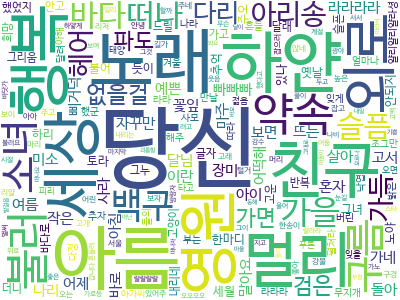

In [69]:
WC = WordCloud(font_path='NanumBarunGothic.ttf' ,background_color='white', width=400, height=300)
count_dic = wc.set_index('단어')['빈도'].to_dict()
# count_dic
cloud = WC.generate_from_frequencies(count_dic)
cloud.to_image()

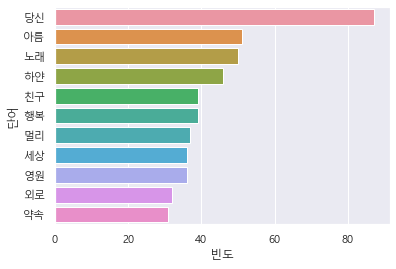

In [70]:
# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline
plt.rc('font', family='malgun gothic') # 그래프에서 한글 깨지는 현상 방지
plt.rcParams['axes.unicode_minus']=False #음수 부호 깨짐 방지
wc11 = wc.sort_values('빈도', ascending=False).head(11)
sns.barplot(wc11['빈도'],wc11['단어'])

sns.set(rc={'figure.figsize':(20,20)}) # , font='NanumBarunGothic.ttf'

In [71]:
# 2010 Top11 words
wc11['year'] = '1970y'
wc1970 = wc11
wc1970

,단어,빈도,year
556,당신,87,1970y
1490,아름,51,1970y
465,노래,50,1970y
2371,하얀,46,1970y
2247,친구,39,1970y
2436,행복,39,1970y
889,멀리,37,1970y
1346,세상,36,1970y
1674,영원,36,1970y
1740,외로,32,1970y


In [72]:
top_word70 = wc1970['단어'].unique().tolist()
stop_w70 = stop_w + top_word70
len(stop_w70)

223

---

## 1980 년대

In [73]:
lyric80 = sort_like80.Lyric

In [74]:
tagging_okt = []
for i in lyric80:
    tag_word = twitter.pos(i,stem=False)
    tagging_okt.append(tag_word)

In [75]:
corpus = []
for song in tagging_okt:
    for word in song:
        if (word[1] == 'Adjective') or (word[1] =='Noun') or (word[1] =='Verb'):
            corpus.append(word[0])
            

In [76]:
word_dict = {}
for i in corpus:
    if i in word_dict:
        word_dict[i] += 1
    else: 
        word_dict[i] = 1
        
# print(word_dict)

In [77]:
cv = CountVectorizer(max_features=5000, stop_words=stop_w70) 
tdm = cv.fit_transform(corpus)

# tdm.shape
# len(cv.get_feature_names())
print(tdm.shape)
print(len(cv.get_feature_names()))

(29896, 3709)
3709


In [78]:
wc = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat
})

ww820 = wc.sort_values('빈도', ascending=False).head(20)
ww820

,단어,빈도
681,눈물,185
50,가슴,164
1461,바람,158
3438,하늘,102
3275,추억,76
1941,세월,75
2034,슬픔,75
1004,떠나,72
3607,홀로,60
155,거리,60


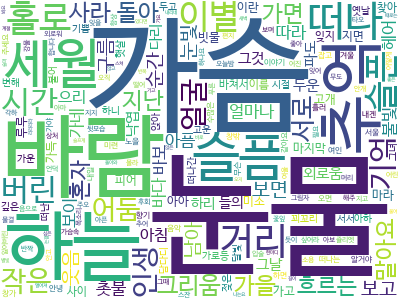

In [79]:
WC = WordCloud(font_path='NanumBarunGothic.ttf' ,background_color='white', width=400, height=300)
count_dic = wc.set_index('단어')['빈도'].to_dict()
# count_dic
cloud = WC.generate_from_frequencies(count_dic)
cloud.to_image()


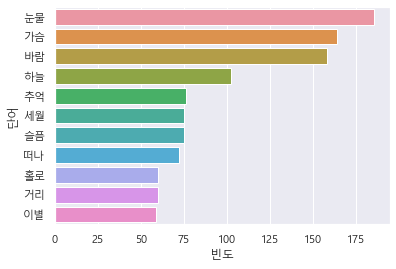

In [80]:
# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline
plt.rc('font', family='malgun gothic') # 그래프에서 한글 깨지는 현상 방지
plt.rcParams['axes.unicode_minus']=False #음수 부호 깨짐 방지
wc11 = wc.sort_values('빈도', ascending=False).head(11)
sns.barplot(wc11['빈도'],wc11['단어'])

sns.set(rc={'figure.figsize':(20,20)}) # , font='NanumBarunGothic.ttf'

In [81]:
# 2010 Top11 words
wc11['year'] = '1980y'
wc1980 = wc11
wc1980


,단어,빈도,year
681,눈물,185,1980y
50,가슴,164,1980y
1461,바람,158,1980y
3438,하늘,102,1980y
3275,추억,76,1980y
1941,세월,75,1980y
2034,슬픔,75,1980y
1004,떠나,72,1980y
3607,홀로,60,1980y
155,거리,60,1980y


In [82]:
top_word80 = wc1980['단어'].unique().tolist()
stop_w80 = stop_w + top_word80
len(stop_w80)

223

---

## 1990 년대

In [83]:
lyric90 = sort_like90.Lyric

In [84]:
tagging_okt = []
for i in lyric90:
    tag_word = twitter.pos(i,stem=False)
    tagging_okt.append(tag_word)

In [85]:
corpus = []
for song in tagging_okt:
    for word in song:
        if (word[1] == 'Adjective') or (word[1] =='Noun') or (word[1] =='Verb'):
            corpus.append(word[0])

In [86]:
word_dict = {}
for i in corpus:
    if i in word_dict:
        word_dict[i] += 1
    else: 
        word_dict[i] = 1
        
# print(word_dict)

In [87]:
cv = CountVectorizer(max_features=5000, stop_words=stop_w80) 
tdm = cv.fit_transform(corpus)

# tdm.shape
# len(cv.get_feature_names())
print(tdm.shape)
print(len(cv.get_feature_names()))

(82746, 5000)
5000


In [88]:
cv.get_feature_names()[:10]

['가게', '가겠', '가겠어', '가겠죠', '가겠지', '가고', '가고만', '가고싶던', '가고있어', '가기']

In [89]:
wc = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat
})

ww920 = wc.sort_values('빈도', ascending=False).head(20)
ww920

,단어,빈도
2430,세상,376
2564,시간,239
4732,행복,223
496,기억,215
3075,영원,170
4810,혼자,141
415,그녀,141
2489,순간,124
2385,서로,124
4355,친구,123


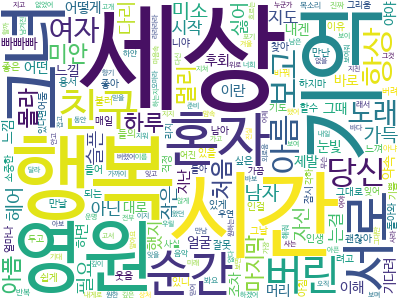

In [90]:
WC = WordCloud(font_path='NanumBarunGothic.ttf' ,background_color='white', width=400, height=300)
count_dic = wc.set_index('단어')['빈도'].to_dict()
# count_dic
cloud = WC.generate_from_frequencies(count_dic)
cloud.to_image()

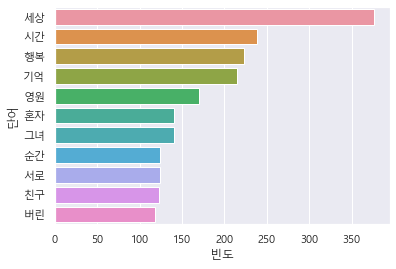

In [91]:
# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline
plt.rc('font', family='malgun gothic') # 그래프에서 한글 깨지는 현상 방지
plt.rcParams['axes.unicode_minus']=False #음수 부호 깨짐 방지
wc11 = wc.sort_values('빈도', ascending=False).head(11)
sns.barplot(wc11['빈도'],wc11['단어'])

sns.set(rc={'figure.figsize':(20,20)}) # , font='NanumBarunGothic.ttf'

In [92]:
# 2010 Top11 words
wc11['year'] = '1990y'
wc1990 = wc11
wc1990


,단어,빈도,year
2430,세상,376,1990y
2564,시간,239,1990y
4732,행복,223,1990y
496,기억,215,1990y
3075,영원,170,1990y
4810,혼자,141,1990y
415,그녀,141,1990y
2489,순간,124,1990y
2385,서로,124,1990y
4355,친구,123,1990y


In [93]:
top_word90 = wc1990['단어'].unique().tolist()
stop_w90 = stop_w + top_word90
len(stop_w90)

223

---

## 2000 년대

In [94]:
lyric20 = sort_like20.Lyric

In [95]:
tagging_okt = []
for i in lyric20:
    tag_word = twitter.pos(i,stem=False)
    tagging_okt.append(tag_word)

In [96]:
corpus = []
for song in tagging_okt:
    for word in song:
        if (word[1] == 'Adjective') or (word[1] =='Noun') or (word[1] =='Verb'):
            corpus.append(word[0])

In [97]:
word_dict = {}
for i in corpus:
    if i in word_dict:
        word_dict[i] += 1
    else: 
        word_dict[i] = 1
        
# print(word_dict)

In [98]:
cv = CountVectorizer(max_features=5000, stop_words=stop_w90) 
tdm = cv.fit_transform(corpus)

# tdm.shape
# len(cv.get_feature_names())
print(tdm.shape)
print(len(cv.get_feature_names()))

(168626, 5000)
5000


In [100]:
cv.get_feature_names()[:10]
#
wc = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat
})

ww220 = wc.sort_values('빈도', ascending=False).head(20)
ww220

,단어,빈도
883,눈물,633
61,가슴,538
4675,하늘,341
4697,하루,250
2125,보고,249
727,남자,231
1748,몰라,223
1936,바보,218
4433,추억,217
821,노래,201


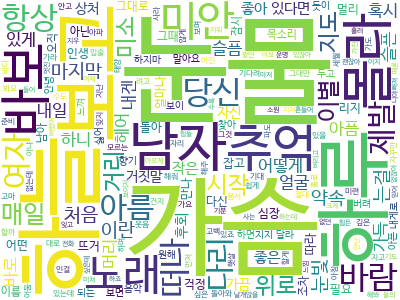

In [101]:
WC = WordCloud(font_path='NanumBarunGothic.ttf' ,background_color='white', width=400, height=300)
count_dic = wc.set_index('단어')['빈도'].to_dict()
# count_dic
cloud = WC.generate_from_frequencies(count_dic)
cloud.to_image()

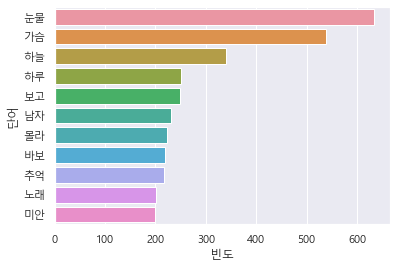

In [102]:
# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline
plt.rc('font', family='malgun gothic') # 그래프에서 한글 깨지는 현상 방지
plt.rcParams['axes.unicode_minus']=False #음수 부호 깨짐 방지
wc11 = wc.sort_values('빈도', ascending=False).head(11)
sns.barplot(wc11['빈도'],wc11['단어'])

sns.set(rc={'figure.figsize':(20,20)}) # , font='NanumBarunGothic.ttf'

In [104]:
# 2000 Top11 words
wc11['year'] = '2000y'
wc2000 = wc11
wc2000


,단어,빈도,year
883,눈물,633,2000y
61,가슴,538,2000y
4675,하늘,341,2000y
4697,하루,250,2000y
2125,보고,249,2000y
727,남자,231,2000y
1748,몰라,223,2000y
1936,바보,218,2000y
4433,추억,217,2000y
821,노래,201,2000y


In [105]:
top_word20 = wc2000['단어'].unique().tolist()
stop_w20 = stop_w + top_word20
len(stop_w20)

223

---

## 2010 년대

In [106]:
lyric2010 = sort_like2010.Lyric

In [107]:
tagging_okt = []
for i in lyric2010:
    tag_word = twitter.pos(i,stem=False)
    tagging_okt.append(tag_word)

In [108]:
corpus = []
for song in tagging_okt:
    for word in song:
        if (word[1] == 'Adjective') or (word[1] =='Noun') or (word[1] =='Verb'):
            corpus.append(word[0])
            

In [109]:
word_dict = {}
for i in corpus:
    if i in word_dict:
        word_dict[i] += 1
    else: 
        word_dict[i] = 1
        
# print(word_dict)

In [110]:
cv = CountVectorizer(max_features=5000, stop_words=stop_w20) 
tdm = cv.fit_transform(corpus)

# tdm.shape
# len(cv.get_feature_names())
print(tdm.shape)
print(len(cv.get_feature_names()))

(148671, 5000)
5000


In [111]:
cv.get_feature_names()[:10]

['가가', '가게', '가겠지', '가고', '가기', '가까워', '가까이', '가끔', '가나', '가난']

In [112]:
wc = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat
})

ww2120 = wc.sort_values('빈도', ascending=False).head(20)
ww2120

,단어,빈도
2737,시간,445
2591,세상,342
515,기억,297
4851,행복,277
2659,순간,269
2879,아름,245
1639,매일,226
4081,좋아,219
4891,혼자,212
1935,바람,209


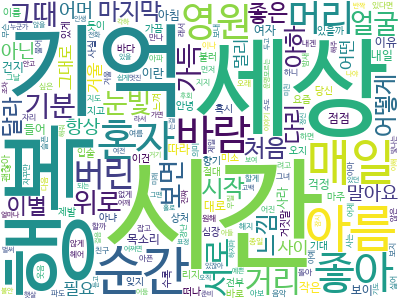

In [113]:
WC = WordCloud(font_path='NanumBarunGothic.ttf' ,background_color='white', width=400, height=300)
count_dic = wc.set_index('단어')['빈도'].to_dict()
# count_dic
cloud = WC.generate_from_frequencies(count_dic)
cloud.to_image()

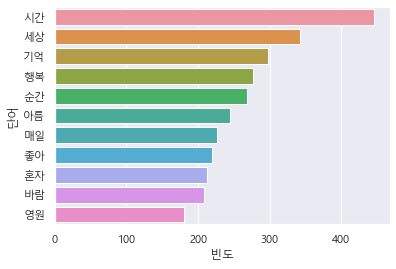

In [114]:
# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline
plt.rc('font', family='malgun gothic') # 그래프에서 한글 깨지는 현상 방지
plt.rcParams['axes.unicode_minus']=False #음수 부호 깨짐 방지
wc11 = wc.sort_values('빈도', ascending=False).head(11)
sns.barplot(wc11['빈도'],wc11['단어'])

sns.set(rc={'figure.figsize':(20,20)}) # , font='NanumBarunGothic.ttf'

In [115]:
# 2010 Top11 words
wc11['year'] = '2010y'
wc2010 = wc11
wc2010

,단어,빈도,year
2737,시간,445,2010y
2591,세상,342,2010y
515,기억,297,2010y
4851,행복,277,2010y
2659,순간,269,2010y
2879,아름,245,2010y
1639,매일,226,2010y
4081,좋아,219,2010y
4891,혼자,212,2010y
1935,바람,209,2010y


In [116]:
# top_word2010 = wc2010['단어'].unique().tolist()
# stop_w += top_word2010
# len(stop_w)

### 연대별 단어 Top11 append
* 1940~ 2010

In [117]:
years_top_word = wc1940.append(wc1950)
years_top_word = years_top_word.append(wc1960)

years_top_word = years_top_word.append(wc1980)
years_top_word = years_top_word.append(wc1990)
years_top_word = years_top_word.append(wc2000)
years_top_word = years_top_word.append(wc2010)
len(years_top_word) 

77

In [118]:
years_top_word = years_top_word.append(wc1970)

In [119]:
len(years_top_word) 

88

In [125]:
years_top_word.to_csv('years_top_word.csv',index=False)

In [120]:
years_top_word.reset_index(drop=True)
display(years_top_word.head(3),years_top_word.tail(3))

,단어,빈도,year
315,노래,42,1940y
343,눈물,41,1940y
32,가슴,27,1940y


,단어,빈도,year
1674,영원,36,1970y
1740,외로,32,1970y
1575,약속,31,1970y


In [121]:
# years_top_word.to_csv('years_top_word.csv',index=False)

In [122]:
## 전체코드

In [123]:
years_t20 = ww420.append(ww520)
years_t20 = years_t20.append(ww620)
years_t20 = years_t20.append(ww720)
years_t20 = years_t20.append(ww820)
years_t20 = years_t20.append(ww920)
years_t20 = years_t20.append(ww220)
years_t20 = years_t20.append(ww2120)
len(years_t20) 

160

### to_csv 파일 저장

In [124]:
years_t20.to_csv('years_freq_word.csv',index=False)